# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from CS270Boi.discussion270 import Discussion
import urllib.request

## 1.0 (0%) Set `net_id` to Your NetID

In [3]:
# This should match your BYU email.
# For example, if my BYU email were jake270@byu.edu, I would set net_id to "jake270"

net_id = "ttromm6"

# --------------------_Make sure to run all of the cells before continuing_--------------------
### The discussions and text box are loaded in by running the cell associated with the discussion.
### If you experience any problems/errors with the discussions, please send Jake Cahoon (TA) a message on Discord :)

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [4]:
# Learn the glass data
from ucimlrepo import fetch_ucirepo 
from tabulate import tabulate
glass_identification = fetch_ucirepo(id=42) 

X = glass_identification.data.features.values
y = glass_identification.data.targets.values.ravel()

table_headers = ["p-value", "train test split", "training accuracy", "testing accuracy"]
results = []

splits = [.15, .2, .25]


for split in splits:
    clf = KNeighborsClassifier(p=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    clf.fit(X_train, y_train)
    results.append([1, split, clf.score(X_train, y_train), clf.score(X_test, y_test)])

print(tabulate(results, headers=table_headers, tablefmt="grid"))

results = []
for split in splits:
    clf = KNeighborsClassifier(p=2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    clf.fit(X_train, y_train)
    results.append([2, split, clf.score(X_train, y_train), clf.score(X_test, y_test)])

print(tabulate(results, headers=table_headers, tablefmt="grid"))

results = []
for split in splits:
    clf = KNeighborsClassifier(p=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    clf.fit(X_train, y_train)
    results.append([3, split, clf.score(X_train, y_train), clf.score(X_test, y_test)])

print(tabulate(results, headers=table_headers, tablefmt="grid"))


# predict_proba for a test set
clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
clf.fit(X_train, y_train)
print('Output probabilities: ', clf.predict_proba(X_test))

+-----------+--------------------+---------------------+--------------------+
|   p-value |   train test split |   training accuracy |   testing accuracy |
+===========+====================+=====================+====================+
|         1 |               0.15 |            0.79558  |           0.757576 |
+-----------+--------------------+---------------------+--------------------+
|         1 |               0.2  |            0.783626 |           0.767442 |
+-----------+--------------------+---------------------+--------------------+
|         1 |               0.25 |            0.775    |           0.722222 |
+-----------+--------------------+---------------------+--------------------+
+-----------+--------------------+---------------------+--------------------+
|   p-value |   train test split |   training accuracy |   testing accuracy |
+===========+====================+=====================+====================+
|         2 |               0.15 |            0.740331 |        

In [5]:
# @title 1.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "1.1KNN"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

The p value represents the minkowski exponent, which is used for calculating distances. p=1 corresponds to the Manhattan distance (sum of distances), p=2 corresponds to the Euclidean distance (square root of sum of distances), and p=3 is the cubed root of the sum of distances. I ran the classifier for p values of 1, 2, and 3, along with test train splits of .15, .2, and .25. The training and testing accuracy results are in the tables above. p values of 1 and 2 had similar performances to each other across the 3 train-test splits in the testing accuracy, while p=1 had slightly higher training accuracies. A p value of 3 performed similarly in training accuracy to p=2 but slightly worse in testing accuracy, dropping by about 3% across each train-test split. This may mean that a higher p value leads to slightly more overfit for this dataset. In general, independent of the split, a p value of 1 is best for this dataset because it as the highest training accuracies and is about tied for the highest testing accuracies. In particular, a good train-test split would be .2 because that had the highest testing accuracy when p=1. 

I calculated the predict-proba probabilities on a test set when using default hyperparameters (k=5, p=2) and a train-test split of .2. These represent the probabilities of a given instance being predicted as each output class. There are 6 possible classes, so each instance has 6 different probabilities that sum to 1. When examinining the probabilities, there are a few instances that the model was very uncertain about, where the highest probability was only .4. Instances such as these are probably why the model's testing accuracies were in the .70s.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [6]:
# Learn magic telescope data
magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features.values 
y = magic_gamma_telescope.data.targets.values.ravel()

clf = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print('Training Accuracy:', clf.score(X_train, y_train))
print('Testing Accuracy:', clf.score(X_test, y_test))

Training Accuracy: 0.8861067297581493
Testing Accuracy: 0.7970557308096741


In [7]:
# @title 2.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.1KNN"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

I used no input normalization and no distance weighting with k=3. The model gave a .89 training accuracy and a .80 testing accuracy. These are relatively good accuacies, but there is room for improvement, especially in the testing accuracy. This shows that preprocessing data and tuning hyperparameters is important, because defaults can lead to lower scores, as they did in this case.  

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [8]:
# Train/Predict with normalization
from sklearn.preprocessing import StandardScaler

magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features.values
y = magic_gamma_telescope.data.targets.values.ravel()

scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print('Training Accuracy:', clf.score(X_train, y_train))
print('Testing Accuracy:', clf.score(X_test, y_test))


Training Accuracy: 0.9070057833859095
Testing Accuracy: 0.8314931650893796


In [9]:
# @title 2.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.2KNN"
questions = ["Discuss the results of using normalized data vs. unnormalized data.", "Why is it a good idea to normalize data before using KNN?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss the results of using normalized data vs. unnormalized data.**

I normalized by scaling the features according to their z-score (standardization). When using unnormalized data, we got a training accuracy of .89 and a testing accuracy of .80. When using normalized data, we got a training accuracy of .91 and a testing accuracy of .83. Because accuracy scores increased for both training and testing data, normalizing the data beforehand shows clear benefits and is not a result of overfit or any other effect.  

**Why is it a good idea to normalize data before using KNN?**

It is smart to normalize data before KNN so that features with different units or scale are not unduly rewarded or penalized when calculating their distance. A feature with very large numbers (such as the mass of a planet) would be artificially penalized with a large distance away because its number is so large. We should normalize input data so that when calculating distance to discover the k-nearest neighbors, all features are considered equally.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [10]:
#Train/Precdict with normalization and distance weighting
from sklearn.preprocessing import StandardScaler

magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features.values
y = magic_gamma_telescope.data.targets.values.ravel()

scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print('Training Accuracy:', clf.score(X_train, y_train))
print('Testing Accuracy:', clf.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8333333333333334


In [11]:
# @title 2.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.3KNN"
questions = ["How did the results change when you used distance weighting?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**How did the results change when you used distance weighting?**

When using inverse-squared distance weighting, our training accuracy jumped up to 1.0 and our testing accuracy stayed at .83. I do not think that this is a sign of overfit because the testing accuracy did not decrease, so I believe that this is still an overall improvement due to the jump in training accuracy. I'm not sure why the inclusion of distance weighting affected training accuracy so much but not testing accuracy. My hypothesis is that the dataset is not complex enough to benefit heavily from distance weighting, and the default of uniform weighting is already capturing the best possible testing accuracy for KNN. 

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

Best k value: 14
Best accuracy: 0.8427970557308097


Text(0.5, 1.0, 'Classification Accuracy vs k value')

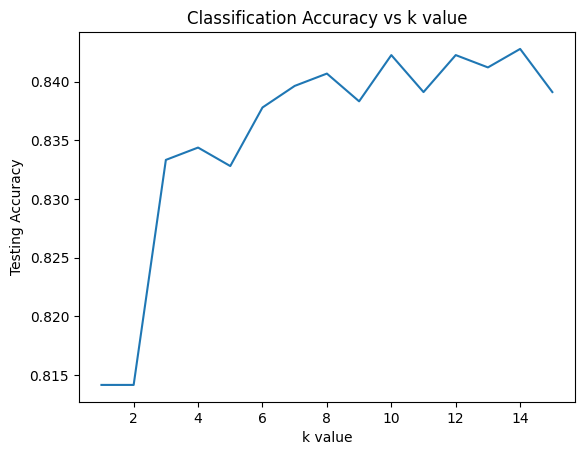

In [24]:
# Calculate and Graph classification accuracy vs k values
from sklearn.preprocessing import StandardScaler

magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features.values
y = magic_gamma_telescope.data.targets.values.ravel()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

k_values = range(1, 16)
testing_accuracies = []

best_k = 0
best_accuracy = 0

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    testing_accuracies.append(clf.score(X_test, y_test))
    if clf.score(X_test, y_test) > best_accuracy:
        best_accuracy = clf.score(X_test, y_test)
        best_k = k
  
print('Best k value:', best_k)
print('Best accuracy:', best_accuracy)
plt.plot(k_values, testing_accuracies)
plt.xlabel('k value')
plt.ylabel('Testing Accuracy')
plt.title('Classification Accuracy vs k value')

In [13]:
# @title 2.4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.4KNN"
questions = ["Which is the best k value for the `magic_telescope` dataset?", "Interpret/describe your graph."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Which is the best k value for the `magic_telescope` dataset?**

The best k value for the magic_telescope dataset that I found was k=14, with a testing accuracy of .843. I am surprised that a higher k value was the best option. Generally, higher k values lead to underfit in the model because the generated neighborhoods of classes become larger. I think that the reason that a higher k value is the best for this dataset is likely because the data is complex enough that many neighboring nodes are required to accurately predict a given instance's class. 

**Interpret/describe your graph.**

From k=1, to k=15, the graph tends to be trending upwards in testing accuracy, meaning that testing accuracies are improving as k gets large. However, from about k=9 and up, it looks like the graph is becoming stagnant, with little improvement in testing accuracies. My hypothesis is that if we were to try k values above 15 (perhaps up to 20 or 30), we would begin to see testing accuracies decrease as the model would begin to underfit the data. 

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

In [14]:
# @title 3.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.1KNN"
questions = ["Which feature is innapropriate and why?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Which feature is innapropriate and why?**

According to the ARFF file, the attribute B is 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. Racial data such as this is highly inappropriate and is not suited to be passed into the learning algorithm because we do not want the model to learn any racial biases. It would be unethical and perhaps illegal if a model began using racial features for regression or classification depending on the task.

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [25]:
# Learn and experiment with housing price prediction data
from io import StringIO
from sklearn.metrics import mean_absolute_error
url = 'https://axon.cs.byu.edu/data/uci_regression/housing.arff'
resp = urllib.request.urlopen(url)
data, meta = arff.loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# no input normalization or distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
print('No normalization or distance weighting Testing Score:', clf.score(X_test, y_test))
print('No normalization or distance weighting MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

# input normalization but no distance weighting
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
print('Input normalization but no distance weighting Testing Score:', clf.score(X_test, y_test))
print('Input normalization but no distance weighting MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

# input normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = KNeighborsRegressor(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)
print('Input normalization and distance weighting Testing Score:', clf.score(X_test, y_test))
print('Input normalization and distance weighting MAE:', mean_absolute_error(y_test, clf.predict(X_test)))




No normalization or distance weighting Testing Score: 0.42630732803822236
No normalization or distance weighting MAE: 4.363725490196079
Input normalization but no distance weighting Testing Score: 0.7576414644687843
Input normalization but no distance weighting MAE: 2.6898692810457523
Input normalization and distance weighting Testing Score: 0.7866249671485452
Input normalization and distance weighting MAE: 2.5861505541085816


In [ ]:
# @title 3.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.2KNN"
questions = ["Discuss your results.", "Which method was the best?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss your results.**

No normalization or distance weighting had the lowest testing score of .43 and the highest MAE of 4.36. Normalization without distance weighting had the middle testing score of .76 and the middle MAE of 2.69. Normalization and distance weighting had the highest testing score of .79 and the lowest MAE of 2.59. In general, as we added normalization and distance weighting, the testing accuracies increased and MAE decreased. This makes sense because normalization and distance weighting tend to help a KNN model perform better due to considering all features equally and prioritizing closer instances. 

**Which method was the best?**

When evaluating a model, better models have higher testing accuries and lower Mean Absolute Errors (MAE). This means that the best method was normalization along with distance weighting. Again, this makes sense because of the benefits that these strategies bring to a KNN model as discussed above. 

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

Best k value: 2
Best MAE: 2.5287844800735684


Text(0.5, 1.0, 'Mean Absolute Error vs k value')

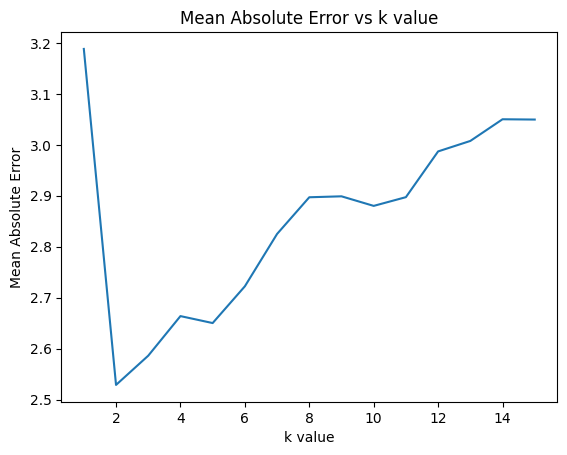

In [26]:
# Learn and graph for different k values
from io import StringIO
url = 'https://axon.cs.byu.edu/data/uci_regression/housing.arff'
resp = urllib.request.urlopen(url)
data, meta = arff.loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

k_values = range(1, 16)
MAE_values = []

best_k = 0
best_MAE = float('inf')

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    MAE = mean_absolute_error(y_test, clf.predict(X_test))
    MAE_values.append(MAE)
    if MAE < best_MAE:
        best_MAE = MAE
        best_k = k

print('Best k value:', best_k)
print('Best MAE:', best_MAE)
plt.plot(k_values, MAE_values)
plt.xlabel('k value')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs k value')

In [18]:
# @title 3.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.3KNN"
questions = ["Which is the best k value for the `housing` dataset?", "Interpret/describe your graph."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Which is the best k value for the `housing` dataset?**

The best k value for the housing dataset was k=2. This means that, when predicting a new instance, the model only considers the class of its 2 nearest neighbors. This leads to small neighborhoods in the model.

**Interpret/describe your graph.**

The graph visualizes MAE as k increases. Lower MAEs are better, which is why k=2 is best because it has the lowest MAE of 2.53. In the graph, MAE starts high ( >3) when k=1, drops to 2.53 when k=2, then gradually but consistently increases as k increases. This means that higher k values are leading to higher MAEs. This is likely because the model is underfitting with higher k values and is leading to greater disparities when predicting the regression value of a new instance, which is why MAE is higher. 

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [19]:
# Train/Predict lymph with your own distance metric
from io import StringIO
url = 'https://axon.cs.byu.edu/data/uci_class/lymph.arff'
resp = urllib.request.urlopen(url)
data, meta = arff.loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

nominal_features = ['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s',
  'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in',
  'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru',
  'special_forms', 'dislocation_of', 'exclusion_of_no'
]
# distance function that uses euclidean distance for continuous features and 0/1 distance for nominal features
def mydist(x, y):
    dist = 0
    for i in range(len(x)):
        if df.columns[i] in nominal_features:
            if x[i] != y[i]:
                dist += 1
        else:
            dist += (x[i] - y[i])**2
    return np.sqrt(dist)

# label encode the nominal features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in nominal_features:
    df[feature] = le.fit_transform(df[feature])

X = df.drop('class', axis=1).values
y = df['class'].values
y = np.array([x.decode('utf-8') for x in y])

clf = KNeighborsClassifier(n_neighbors=3, metric=mydist)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)
print('Training Accuracy:', clf.score(X_train, y_train))
print('Testing Accuracy:', clf.score(X_test, y_test))

Training Accuracy: 0.8813559322033898
Testing Accuracy: 0.7666666666666667


In [ ]:
# @title 4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "4KNN"
questions = ["Explain your distance metric.", "Discuss the results of using your own distance metric."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Explain your distance metric.**

Many of the features in the lymph dataset are nominal. To solve this, I implemented a custom distance function that used euclidean distance between numerical (real) features and 0/1 distance between nominal features. 0/1 distance means that if the features have the same value, they have a distance of 0, and if the features have different values, they have a distance of 1. To create this function, I first had to store in a list which features were nominal. When computing the distance between 2 instances, I looped over their features. If the current feature was in my list of nominal features, I used 0/1 distance, and if it was not, I used euclidean distance. I summed up these distances, and returned the square root of the result as the final distance between the 2 instances.

**Discuss the results of using your own distance metric.**

Using this custom distance function, I achieved a training accuracy of .88 and a testing accuracy of .77. These are pretty good accuracies, but there is room for improvement, especially in the testing accuracy. A lower testing accuracy could mean that the model is slightly overfitting with k=3. Its possible that increasing k could lead to less disparity between the training and testing accuracies. 

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

In [21]:
# @title 5 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "5KNN"
questions = ["Discuss what you learned from implementing a KNN from scratch."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss what you learned from implementing a KNN from scratch.**

I coded up both a KNNClassifier and a KNNRegressor. On the magic_telescope dataset, I achieved a testing accuracy of .34. The classifier model took a long time to run (more than 2 minutes on the testing set), so I decided not to compute the training accuracy because of how long it would take to classify that many instances. I believe that I am not being as efficient as possible when predicting a new instance because the sklearn model only takes a few seconds to classify the same dataset. Coding up the KNNClassifier showed that KNN is a lazy model that does not do any training. It does all the required work when classifying an instance. I also learned that efficiency when coding a model is extremely important because we would ideally like to use the model on very large datasets. If the model is not efficient internally, it will take a very long time to fully classify larger datasets. The sklearn model was able to achieve testing accuracy scores in the .80s, but my classifier only achieved a testing accuracy of .34. To me, this is an indicator that there is probably a logic error in my implementation.

I also created a KNNRegressor model to perform regression with KNN. This was much easier to implement because it looks very similar to the classifier. The only difference is the model uses a slightly different function of the distances to compute a regression value instead of a class value. On the housing dataset, the regressor achieved a training score of -3.14 and a testing score of -3.60. For a regressor, the score is the coefficient of determination between the predicted regression values and the actual values. According to the sklearn documentation, a negative score is possible. A score of 0 means the model is performing randomly, so a negative score means the model is performing even worse than random. The sklearn implementation achieved a testing score of .78 on the housing dataset. This is another sign that there is probably a bug in my implementation because of the disparity between my model's score and the sklearn model's score. I still feel that I learned a lot from implementing my own KNN models and I've gained an increased understanding of the KNN algorithm on topics such as the distances calculation, the lazy learning aspect of the algorithm, the weighted distances, and more. 

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin
import math

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance', k=3): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.k = k
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.data = data
        self.labels = labels

        return self
    
    def distance(self, a, b):
        euclidean_distance = math.sqrt(sum([(a[i] - b[i])**2 for i in range(len(a))]))
        return euclidean_distance
    
    def k_largest(self, distances):
        k_largest = []
        for i in range(self.k):
            max_index = 0
            for j in range(len(distances)):
                if distances[j][1] > distances[max_index][1]:
                    max_index = j
            k_largest.append(distances[max_index])
            distances[max_index] = (distances[max_index][0], -1)
        return k_largest

    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """

        predictions = []

        n = len(data)

        for j in range(n):
            if j == math.floor(n/4):
                print(".25 done")
            
            if j == math.floor(n/2):
                print(".5 done")

            if j == math.floor(3*n/4):
                print(".75 done")

            instance = data[j]
            distances = []
            for i in range(len(self.data)):
                if i == j: # skip the instance itself
                    continue
                distances.append((i, self.distance(instance, self.data[i])))
            k_nearest = self.k_largest(distances)
            k_nearest_labels = [self.labels[i] for i, _ in k_nearest]
            if self.weight_type == 'inverse_distance':
                weights = [(1 / (d**2) if d != 0 else 0) for _, d in k_nearest]
                weighted_votes = {}
                for i in range(len(k_nearest_labels)):
                    label = k_nearest_labels[i]
                    if label in weighted_votes:
                        weighted_votes[label] += weights[i]
                    else:
                        weighted_votes[label] = weights[i]
                predictions.append(max(weighted_votes, key=weighted_votes.get))
            else:
                predictions.append(max(k_nearest_labels))
        return predictions

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X)
        print('predictions:', predictions)
        return np.mean(predictions == y)

In [28]:
# magic telescope
magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features.values
y = magic_gamma_telescope.data.targets.values.ravel()

clf = KNNClassifier(k=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)
print('Testing Accuracy:', clf.score(X_test, y_test))

.25 done
.5 done
.75 done
predictions: ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import math

class KNNRegressor(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance', k=3): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.k = k
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.data = data
        self.labels = labels

        return self
    
    def distance(self, a, b):
        euclidean_distance = math.sqrt(sum([(a[i] - b[i])**2 for i in range(len(a))]))
        return euclidean_distance
    
    def k_largest(self, distances):
        k_largest = []
        for i in range(self.k):
            max_index = 0
            for j in range(len(distances)):
                if distances[j][1] > distances[max_index][1]:
                    max_index = j
            k_largest.append(distances[max_index])
            distances[max_index] = (distances[max_index][0], -1)
        return k_largest

    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """

        predictions = []

        for j in range(len(data)):
            instance = data[j]
            distances = []
            for i in range(len(self.data)):
                if i == j: # skip the instance itself
                    continue
                distances.append((i, self.distance(instance, self.data[i])))
            k_nearest = self.k_largest(distances)
            k_nearest_labels = [self.labels[i] for i, _ in k_nearest]
            if self.weight_type == 'inverse_distance':
                weights = [(1 / (d**2) if d != 0 else 0) for _, d in k_nearest]
                
                output = sum([k_nearest_labels[i] * weights[i] for i in range(len(k_nearest_labels))]) / sum(weights)
                predictions.append(output)
            else:
                # average of k nearest neighbors regression labels
                predictions.append(np.mean(k_nearest_labels))
            
        return predictions

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = np.array(self.predict(X))
        y = np.array(y)
        # score for regressor is the coefficient of determination
        u = sum((y - predictions)**2)
        v = sum((y - np.mean(y))**2)

        return 1 - (u/v)

In [ ]:
# housing price prediction
from io import StringIO
url = 'https://axon.cs.byu.edu/data/uci_regression/housing.arff'
resp = urllib.request.urlopen(url)
data, meta = arff.loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNNRegressor(k=3)
clf.fit(X_train, y_train)
print('Training Score:', clf.score(X_train, y_train))
print('Testing Score:', clf.score(X_test, y_test))



Training Score: -3.144541251904558
Testing Score: -3.6020729164726655
